<a href="https://colab.research.google.com/github/Aditya-1717/Intro-to-Machine-Learning/blob/main/HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import datasets

cancer = datasets.load_breast_cancer()

Classification: linear
Accuracy: 0.9385964912280702
Precision: 0.9848484848484849
Recall: 0.9154929577464789

Classification: poly
Accuracy: 0.9385964912280702
Precision: 0.9444444444444444
Recall: 0.9577464788732394

Classification: rbf
Accuracy: 0.9385964912280702
Precision: 0.9705882352941176
Recall: 0.9295774647887324

Classification: sigmoid
Accuracy: 0.956140350877193
Precision: 0.9459459459459459
Recall: 0.9859154929577465



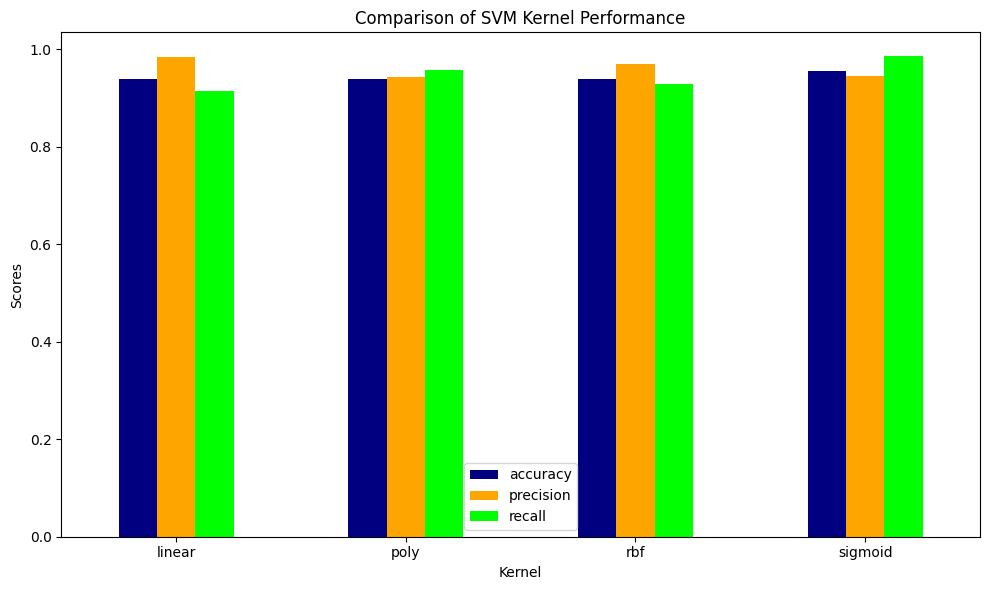

In [114]:
X = cancer.data
Y = cancer.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Standardization
scaler_std = StandardScaler()
X_train = scaler_std.fit_transform(X_train)
X_test = scaler_std.transform(X_test)

#Creating classifier and training each type
L_model = SVC(kernel='linear', C=1e4)
L_model.fit(X_train, Y_train)

P_model = SVC(kernel='poly', C=1e4)
P_model.fit(X_train, Y_train)

R_model = SVC(kernel='rbf', C=1e4)
R_model.fit(X_train, Y_train)

S_model = SVC(kernel='sigmoid', C=1e4)
S_model.fit(X_train, Y_train)

#Predict the models
L_pred = L_model.predict(X_test)
P_pred = P_model.predict(X_test)
R_pred = R_model.predict(X_test)
S_pred = S_model.predict(X_test)
predictions = [L_pred, P_pred, R_pred, S_pred]

#Take the test output and run it through the test dataset
results = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i, kernel in enumerate(predictions):
  accuracy = accuracy_score(Y_test, kernel)
  precision = precision_score(Y_test, kernel)
  recall = recall_score(Y_test, kernel)
  results[kernels[i]] = {'accuracy': accuracy, 'precision': precision, 'recall': recall}

  print(f"Classification: {kernels[i]}")
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print()

#Bar graph to show the results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10, 6), color =['navy', 'orange', 'lime'])
plt.title('Comparison of SVM Kernel Performance')
plt.ylabel('Scores')
plt.xlabel('Kernel')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [115]:
#Problem 2
url= 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.read_csv(url)

inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
vlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in vlist:
    housing[col] = housing[col].map({'yes': 1, 'no': 0})

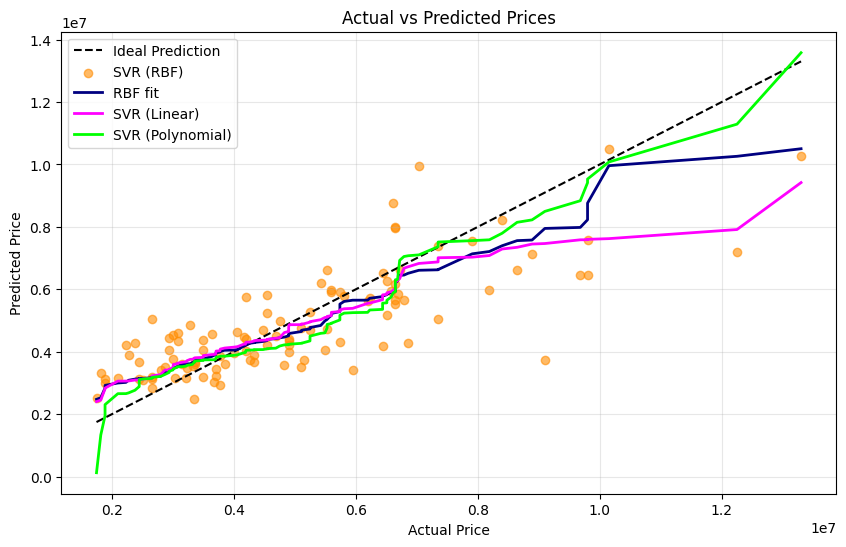

In [116]:
X2 = housing[inputs].values
Y2 = housing.values[:, 0];
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

#Standardization
scalar = StandardScaler()
X2_train = scalar.fit_transform(X2_train)
X2_test = scalar.transform(X2_test)

#Creating classifier and training for each type
L_model = SVR(kernel='linear', C=1e7)
L_model.fit(X2_train, Y2_train)

P_model = SVR(kernel='poly', C=1e7)
P_model.fit(X2_train, Y2_train)

R_model = SVR(kernel='rbf', C=1e7)
R_model.fit(X2_train, Y2_train)

#Predict the models
L_pred_svr = L_model.predict(X2_test)
P_pred_svr = P_model.predict(X2_test)
R_pred_svr = R_model.predict(X2_test)
svr_predications = [L_pred_svr, P_pred_svr, R_pred_svr]

results_svr = {}
kernels = ['linear', 'poly', 'rbf']
for i, kernel in enumerate(svr_predications):
  rmse = np.sqrt(mean_squared_error(Y2_test, kernel))
  r2 = r2_score(Y2_test, kernel)

lw = 2
plt.figure(figsize=(10, 6))

#Sorting the price array to plot a more smoothly predicted graph
sorted_idx = np.argsort(Y2_test)
Y2_test_sorted = Y2_test[sorted_idx]

#Graph for Problem 2
plt.plot([min(Y2_test), max(Y2_test)], [min(Y2_test), max(Y2_test)], color='black', linestyle='--', label='Ideal Prediction')
plt.scatter(Y2_test, R_pred_svr, color='darkorange', label='SVR (RBF)', alpha=0.6)
plt.plot(Y2_test_sorted, np.sort(R_pred_svr), color='navy', lw=lw, label='RBF fit')
plt.plot(Y2_test_sorted, np.sort(L_pred_svr), color='magenta', lw=lw, label='SVR (Linear)')
plt.plot(Y2_test_sorted, np.sort(P_pred_svr), color='lime', lw=lw, label='SVR (Polynomial)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()